In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Simmons.xlsx")
df

,Customer,Spending,Card,Coupon
0,1,2.291,0,0
1,2,2.359,0,0
2,3,3.358,0,0
3,4,3.254,0,1
4,5,3.853,1,1
5,6,4.257,1,1
6,7,2.256,0,0
7,8,3.254,1,1
8,9,2.357,1,0
9,10,7.256,1,1


In [3]:
df['Coupon'].unique()

array([0, 1], dtype=int64)

In [4]:
df['Coupon'].value_counts()

1    21
0    19
Name: Coupon, dtype: int64

# __1.Split dataset into training and testing sets__

In [5]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
x = df[['Card', 'Spending']]
y = df['Coupon'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
len(x_train), len(y_train), len(x_test), len(y_test)

(30, 30, 10, 10)

# __2.Building the model and predicting values__

In [8]:
Lreg = LogisticRegression(solver = 'lbfgs')
Lreg.fit(x_train, y_train.ravel()) # ravel() will return 1D array with all the input-array elements

LogisticRegression()

In [9]:
y_predict = Lreg.predict(x_test)
y_predict

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [10]:
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

# __3.Calculate probability of predicting data values__

In [11]:
x_train

,Card,Spending
25,0,3.258
9,1,7.256
13,1,7.585
31,0,2.256
34,1,6.324
8,1,2.357
17,0,1.365
24,0,2.258
0,0,2.291
33,1,5.364


In [12]:
y_prob_train = Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.23324537, 0.94390548, 0.95535726, 0.12761043, 0.89491508,
        0.31934297, 0.0708752 , 0.12777322, 0.13048482, 0.80852775,
        0.65284509, 0.80060575, 0.13622668, 0.65301068, 0.72815217,
        0.24656739, 0.47486886, 0.57940112, 0.23272304, 0.38679116,
        0.65284509, 0.13596893, 0.89648514, 0.89029254, 0.15511928,
        0.80407713, 0.47468665, 0.94398281, 0.89029254, 0.65301068]])

In [13]:
x_test

,Card,Spending
19,0,3.256
16,0,2.258
15,1,6.256
26,0,4.586
4,1,3.853
12,1,6.875
37,1,3.325
27,1,5.258
39,0,3.256
6,0,2.256


In [14]:
y_prob = Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.2329841 , 0.12777322, 0.89014972, 0.44529878, 0.58330587,
       0.92720888, 0.48763773, 0.79624946, 0.2329841 , 0.12761043])

# __4.Summary for logistic model__

In [15]:
x = df[['Spending', 'Card']]
y = df['Coupon']

In [16]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.374153
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                   40
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                  0.4592
Time:                        10:37:28   Log-Likelihood:                -14.966
converged:                       True   LL-Null:                       -27.676
Covariance Type:            nonrobust   LLR p-value:                 3.021e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9161      1.593     -3.086      0.002      -8.038      -1.794
Spending       0.9518      0.

# __5.Calculating Accuracy, Specifity, Sensitivity__

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.9

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[5, 0],
       [1, 4]], dtype=int64)

In [19]:
TrueNegative, FalsePositive, FalseNegative, TruePositive = confusion_matrix(y_test, y_predict).ravel()
print(TrueNegative, FalsePositive, FalseNegative, TruePositive)

5 0 1 4


In [20]:
Precision = TruePositive / (TruePositive + FalsePositive)
Precision

1.0

In [21]:
Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)
Accuracy

0.9

In [22]:
Recall = TruePositive / (TruePositive + FalseNegative)
Recall

0.8

In [23]:
#True Negative Rate
Specifity = TrueNegative / (TrueNegative + FalsePositive)
Specifity

1.0

In [24]:
#True Positive Rate
Sensitivity = TruePositive / (TruePositive + FalseNegative)
Sensitivity

0.8

# __6.ROC Curve for Training dataset__

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train, y_prob_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

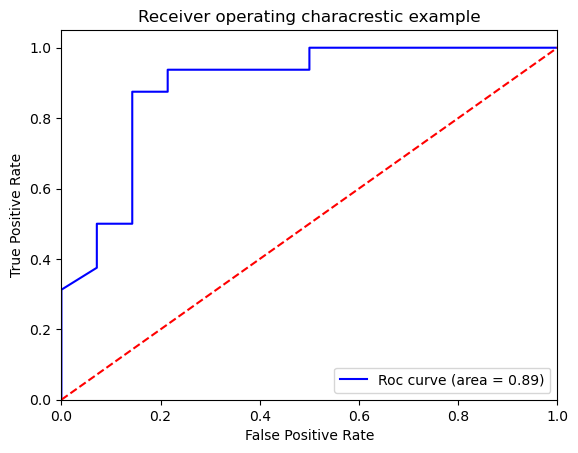

In [26]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label = 'Roc curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characrestic example')
plt.legend(loc = 'lower right')
plt.show()

# __7.ROC curve for Test data set__

In [27]:
log_ROC_AUC = roc_auc_score(y_train, y_prob_train)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

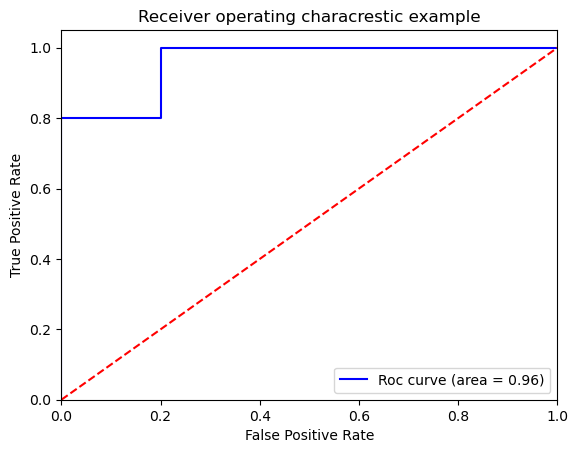

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label = 'Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characrestic example')
plt.legend(loc = 'lower right')
plt.show()

# __8.Accuracy checking for different threshold values__

In [29]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1), threshold=0.35)[0]
y_predict_class1

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0.])

In [30]:
#converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [31]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[4 1]
 [0 5]]


In [32]:
y_predict_class2 = binarize(y_prob.reshape(1,-1), threshold=0.50)[0]
y_predict_class2

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

In [33]:
#converting the array from float data type to integer data type
y_predict_class2 = y_predict_class2.astype(int)
y_predict_class2

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [34]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[5 0]
 [1 4]]


In [35]:
y_predict_class3 = binarize(y_prob.reshape(1,-1), threshold=0.45)[0]
y_predict_class3

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 0.])

In [36]:
#converting the array from float data type to integer data type
y_predict_class3 = y_predict_class3.astype(int)
y_predict_class3

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [37]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[4 1]
 [1 4]]


In [38]:
y_predict_class4 = binarize(y_prob.reshape(1,-1), threshold=0.70)[0]
y_predict_class4

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])

In [39]:
#converting the array from float data type to integer data type
y_predict_class4 = y_predict_class4.astype(int)
y_predict_class4

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [40]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[5 0]
 [2 3]]


# __9.Calculating Optimal Threshold Value__

In [41]:
from sklearn.metrics import roc_curve, auc

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [43]:
print('Area under the ROC curve : %f' % roc_auc)

Area under the ROC curve : 0.960000


In [44]:
import numpy as np
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index = i), 'tpr' : pd.Series(tpr, index = i),
                   '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i),
                   'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
3,0.2,0.8,0.8,0.0,0.487638


# __10.Optimal Threshold Value in ROC Curve__

[Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, '')]

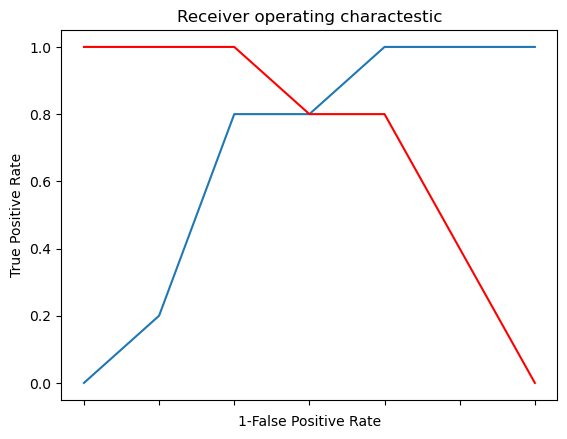

In [45]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating charactestic')
ax.set_xticklabels([])

In [46]:
y_predict_class5 = binarize(y_prob.reshape(1,-1), threshold=0.49)[0]
y_predict_class5

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

In [47]:
#converting the array from float data type to integer data type
y_predict_class5 = y_predict_class5.astype(int)
y_predict_class5

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [48]:
confusion_matrix_6 = confusion_matrix(y_test, y_predict_class5)
print(confusion_matrix_6)

[[5 0]
 [1 4]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class5))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



__Threshold: 0.49 <br>
True Negative Rate: Specifity = 1.00 <br>
True Positive Rate: Sensitivity =  0.80__